# L4. Uninformed Search Strategies 

OR you can develop your own simple Maze generator (as we are going to do).

The `maze` can be represented as a `2D array`, where:
* 0 represents a wall , 
* and 1 represents an open path.
* We can change if want

In [8]:
n=7

In [9]:
from src.mazeData import makeMaze

In [10]:
maze1=makeMaze(n)
maze1

array([[1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0]])

In [64]:
from src.mazeData import defineMazeActions

In [65]:
mazeALLActs=defineMazeActions(maze1) 
# All *possible* actions
# - Not what we can actually do, which are *available* actions
# - Assumes no walls, kind of a heuristic
mazeALLActs

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'right', 'down'],
 (0, 4): ['left', 'right', 'down'],
 (0, 5): ['left', 'right', 'down'],
 (0, 6): ['left', 'down'],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'up', 'right', 'down'],
 (1, 2): ['left', 'up', 'right', 'down'],
 (1, 3): ['left', 'up', 'right', 'down'],
 (1, 4): ['left', 'up', 'right', 'down'],
 (1, 5): ['left', 'up', 'right', 'down'],
 (1, 6): ['left', 'up', 'down'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'right', 'down'],
 (2, 2): ['left', 'up', 'right', 'down'],
 (2, 3): ['left', 'up', 'right', 'down'],
 (2, 4): ['left', 'up', 'right', 'down'],
 (2, 5): ['left', 'up', 'right', 'down'],
 (2, 6): ['left', 'up', 'down'],
 (3, 0): ['up', 'right', 'down'],
 (3, 1): ['left', 'up', 'right', 'down'],
 (3, 2): ['left', 'up', 'right', 'down'],
 (3, 3): ['left', 'up', 'right', 'down'],
 (3, 4): ['left', 'up', 'right', 'down'],
 (3, 5): 

In [13]:
from src.mazeData import defineMazeAvailableActions

In [14]:
mazeAvalActs=defineMazeAvailableActions(maze1)
# These actions take walls into account
# They are the actions we *can* actually do from each state
mazeAvalActs

# Can't move if in a wall cell, since it's not possible to even be there
# Can't move into a wall cell obviously

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right'],
 (0, 3): ['left', 'down'],
 (0, 4): [],
 (0, 5): ['down'],
 (0, 6): [],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'up', 'down'],
 (1, 2): [],
 (1, 3): ['up'],
 (1, 4): [],
 (1, 5): ['up', 'right', 'down'],
 (1, 6): ['left', 'down'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'right', 'down'],
 (2, 2): ['left', 'down'],
 (2, 3): [],
 (2, 4): [],
 (2, 5): ['up', 'right', 'down'],
 (2, 6): ['left', 'up', 'down'],
 (3, 0): ['up', 'right'],
 (3, 1): ['left', 'up', 'right'],
 (3, 2): ['left', 'up', 'right'],
 (3, 3): ['left', 'down'],
 (3, 4): [],
 (3, 5): ['up', 'right', 'down'],
 (3, 6): ['left', 'up', 'down'],
 (4, 0): [],
 (4, 1): [],
 (4, 2): [],
 (4, 3): ['up', 'right', 'down'],
 (4, 4): ['left', 'right', 'down'],
 (4, 5): ['left', 'up', 'right', 'down'],
 (4, 6): ['left', 'up', 'down'],
 (5, 0): ['down'],
 (5, 1): [],
 (5, 2): ['right', 'down'],
 (5, 3): ['left', 'up', 

In [15]:
maze1

array([[1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0]])

Next we need to define the **Transition (Transformation) Model (TM)**

Transition Model: Describes what each action does. RESULT(s, a) returns the state that results from performing action "a" in state "s".

In [16]:
from src.mazeData import makeMazeTransformationModel

Since the TM describes what each action does the set of available actions is used as a input for it.

In [17]:
maze1TM=makeMazeTransformationModel(mazeAvalActs) # Still using *available* actions
maze1TM

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (0, 4): {},
 (0, 5): {'down': (1, 5)},
 (0, 6): {},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'down': (2, 1)},
 (1, 2): {},
 (1, 3): {'up': (0, 3)},
 (1, 4): {},
 (1, 5): {'up': (0, 5), 'right': (1, 6), 'down': (2, 5)},
 (1, 6): {'left': (1, 5), 'down': (2, 6)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'down': (3, 2)},
 (2, 3): {},
 (2, 4): {},
 (2, 5): {'up': (1, 5), 'right': (2, 6), 'down': (3, 5)},
 (2, 6): {'left': (2, 5), 'up': (1, 6), 'down': (3, 6)},
 (3, 0): {'up': (2, 0), 'right': (3, 1)},
 (3, 1): {'left': (3, 0), 'up': (2, 1), 'right': (3, 2)},
 (3, 2): {'left': (3, 1), 'up': (2, 2), 'right': (3, 3)},
 (3, 3): {'left

### Maze Graph

In [18]:
from src.graphProblemClass import GraphProblem

In [19]:
from src.maze2025GraphClass import mazeGraph

In [20]:
from src.mazeData import mazeStatesLocations

In [21]:
list(maze1TM.keys())

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [22]:
mazeWorldGraph = mazeGraph(maze1TM, mazeStatesLocations(list(maze1TM.keys())))

In [23]:
mazeWorldGraph.nodes()
# Only includes states where an action is available
# - Does not include cells occupied by a wall
# - Does not include open cells that are surrounded by walls - as no action available

[(4, 3),
 (3, 1),
 (5, 4),
 (4, 6),
 (0, 2),
 (0, 5),
 (2, 2),
 (1, 0),
 (1, 6),
 (2, 5),
 (1, 3),
 (6, 2),
 (6, 5),
 (3, 0),
 (4, 5),
 (3, 3),
 (5, 0),
 (5, 6),
 (3, 6),
 (5, 3),
 (0, 1),
 (2, 1),
 (1, 5),
 (6, 1),
 (6, 4),
 (3, 2),
 (3, 5),
 (5, 2),
 (4, 4),
 (5, 5),
 (0, 0),
 (1, 1),
 (0, 3),
 (2, 0),
 (2, 6),
 (6, 0),
 (6, 3)]

In [24]:
mazeWorldGraph.graph_dict

{(0, 0): {(0, 1): 1, (1, 0): 1},
 (0, 1): {(0, 0): 1, (0, 2): 1, (1, 1): 1},
 (0, 2): {(0, 1): 1, (0, 3): 1},
 (0, 3): {(0, 2): 1, (1, 3): 1},
 (0, 5): {(1, 5): 1},
 (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
 (1, 1): {(1, 0): 1, (0, 1): 1, (2, 1): 1},
 (1, 3): {(0, 3): 1},
 (1, 5): {(0, 5): 1, (1, 6): 1, (2, 5): 1},
 (1, 6): {(1, 5): 1, (2, 6): 1},
 (2, 0): {(1, 0): 1, (2, 1): 1, (3, 0): 1},
 (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1, (3, 1): 1},
 (2, 2): {(2, 1): 1, (3, 2): 1},
 (2, 5): {(1, 5): 1, (2, 6): 1, (3, 5): 1},
 (2, 6): {(2, 5): 1, (1, 6): 1, (3, 6): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1},
 (3, 1): {(3, 0): 1, (2, 1): 1, (3, 2): 1},
 (3, 2): {(3, 1): 1, (2, 2): 1, (3, 3): 1},
 (3, 3): {(3, 2): 1, (4, 3): 1},
 (3, 5): {(2, 5): 1, (3, 6): 1, (4, 5): 1},
 (3, 6): {(3, 5): 1, (2, 6): 1, (4, 6): 1},
 (4, 3): {(3, 3): 1, (4, 4): 1, (5, 3): 1},
 (4, 4): {(4, 3): 1, (4, 5): 1, (5, 4): 1},
 (4, 5): {(4, 4): 1, (3, 5): 1, (4, 6): 1, (5, 5): 1},
 (4, 6): {(4, 5): 1, (3, 6): 1, (5, 6): 1},

In [25]:
mazeWorldGraph.origin # Retains nodes with no available actions - good for visualization

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (0, 4): {},
 (0, 5): {'down': (1, 5)},
 (0, 6): {},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'down': (2, 1)},
 (1, 2): {},
 (1, 3): {'up': (0, 3)},
 (1, 4): {},
 (1, 5): {'up': (0, 5), 'right': (1, 6), 'down': (2, 5)},
 (1, 6): {'left': (1, 5), 'down': (2, 6)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'down': (3, 2)},
 (2, 3): {},
 (2, 4): {},
 (2, 5): {'up': (1, 5), 'right': (2, 6), 'down': (3, 5)},
 (2, 6): {'left': (2, 5), 'up': (1, 6), 'down': (3, 6)},
 (3, 0): {'up': (2, 0), 'right': (3, 1)},
 (3, 1): {'left': (3, 0), 'up': (2, 1), 'right': (3, 2)},
 (3, 2): {'left': (3, 1), 'up': (2, 2), 'right': (3, 3)},
 (3, 3): {'left

In [26]:
mazeWorldGraph.locations

{(0, 0): (0, 0),
 (0, 1): (50, 0),
 (0, 2): (100, 0),
 (0, 3): (150, 0),
 (0, 4): (200, 0),
 (0, 5): (250, 0),
 (0, 6): (300, 0),
 (1, 0): (0, 50),
 (1, 1): (50, 50),
 (1, 2): (100, 50),
 (1, 3): (150, 50),
 (1, 4): (200, 50),
 (1, 5): (250, 50),
 (1, 6): (300, 50),
 (2, 0): (0, 100),
 (2, 1): (50, 100),
 (2, 2): (100, 100),
 (2, 3): (150, 100),
 (2, 4): (200, 100),
 (2, 5): (250, 100),
 (2, 6): (300, 100),
 (3, 0): (0, 150),
 (3, 1): (50, 150),
 (3, 2): (100, 150),
 (3, 3): (150, 150),
 (3, 4): (200, 150),
 (3, 5): (250, 150),
 (3, 6): (300, 150),
 (4, 0): (0, 200),
 (4, 1): (50, 200),
 (4, 2): (100, 200),
 (4, 3): (150, 200),
 (4, 4): (200, 200),
 (4, 5): (250, 200),
 (4, 6): (300, 200),
 (5, 0): (0, 250),
 (5, 1): (50, 250),
 (5, 2): (100, 250),
 (5, 3): (150, 250),
 (5, 4): (200, 250),
 (5, 5): (250, 250),
 (5, 6): (300, 250),
 (6, 0): (0, 300),
 (6, 1): (50, 300),
 (6, 2): (100, 300),
 (6, 3): (150, 300),
 (6, 4): (200, 300),
 (6, 5): (250, 300),
 (6, 6): (300, 300)}

In [27]:
mazeWorldGraph.get((0, 1), (0,2))

1

Let's try to show the graph of our Maze

In [28]:
from pyvis.network import Network 

In [29]:
net_maze = Network( heading="Lab4. Examples of Maze World Problem",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%",
                directed=True # I added
) # do this


In [30]:
mazeWorldGraph.origin

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (0, 4): {},
 (0, 5): {'down': (1, 5)},
 (0, 6): {},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'down': (2, 1)},
 (1, 2): {},
 (1, 3): {'up': (0, 3)},
 (1, 4): {},
 (1, 5): {'up': (0, 5), 'right': (1, 6), 'down': (2, 5)},
 (1, 6): {'left': (1, 5), 'down': (2, 6)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'down': (3, 2)},
 (2, 3): {},
 (2, 4): {},
 (2, 5): {'up': (1, 5), 'right': (2, 6), 'down': (3, 5)},
 (2, 6): {'left': (2, 5), 'up': (1, 6), 'down': (3, 6)},
 (3, 0): {'up': (2, 0), 'right': (3, 1)},
 (3, 1): {'left': (3, 0), 'up': (2, 1), 'right': (3, 2)},
 (3, 2): {'left': (3, 1), 'up': (2, 2), 'right': (3, 3)},
 (3, 3): {'left

In [31]:
maze1

array([[1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0]])

In [32]:
maze1[0,1]

np.int64(1)

In [33]:
nodeColors={
    "wall":"red",
    "path": "white"
}

In [34]:
nodeColorsList=[]

for node in mazeWorldGraph.origin.keys():
    if maze1[node[0],node[1]]==1:
        nodeColorsList.append(nodeColors["path"])
    else:
        nodeColorsList.append(nodeColors["wall"])
nodeColorsList

['white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'red',
 'red',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'red']

In [35]:
# Needed since pyvis does not take tuples as dict keys
nodes=["-".join(str(item) for item in el) for el in mazeWorldGraph.origin.keys()]
nodes

['0-0',
 '0-1',
 '0-2',
 '0-3',
 '0-4',
 '0-5',
 '0-6',
 '1-0',
 '1-1',
 '1-2',
 '1-3',
 '1-4',
 '1-5',
 '1-6',
 '2-0',
 '2-1',
 '2-2',
 '2-3',
 '2-4',
 '2-5',
 '2-6',
 '3-0',
 '3-1',
 '3-2',
 '3-3',
 '3-4',
 '3-5',
 '3-6',
 '4-0',
 '4-1',
 '4-2',
 '4-3',
 '4-4',
 '4-5',
 '4-6',
 '5-0',
 '5-1',
 '5-2',
 '5-3',
 '5-4',
 '5-5',
 '5-6',
 '6-0',
 '6-1',
 '6-2',
 '6-3',
 '6-4',
 '6-5',
 '6-6']

In [36]:
x_coords = []
y_coords = []

for node in mazeWorldGraph.origin.keys():
    x,y=mazeWorldGraph.getLocation(node)
    x_coords.append(x)
    y_coords.append(y)

print(x_coords)   
print(y_coords)


[0, 50, 100, 150, 200, 250, 300, 0, 50, 100, 150, 200, 250, 300, 0, 50, 100, 150, 200, 250, 300, 0, 50, 100, 150, 200, 250, 300, 0, 50, 100, 150, 200, 250, 300, 0, 50, 100, 150, 200, 250, 300, 0, 50, 100, 150, 200, 250, 300]
[0, 0, 0, 0, 0, 0, 0, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 250, 250, 250, 250, 250, 250, 250, 300, 300, 300, 300, 300, 300, 300]


In [37]:
sizes=[10]*len(nodes)
sizes

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [38]:
#hidden labels, and hover titles
net_maze.add_nodes(nodes, color=nodeColorsList, x=x_coords, y=y_coords, size=sizes, title=nodes)

In [39]:
for node in net_maze.nodes:
    node['label']='' # She said labels looked bad so got rid of them this way

In [40]:
net_maze.nodes

[{'color': 'white',
  'x': 0,
  'y': 0,
  'size': 10,
  'title': '0-0',
  'id': '0-0',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 50,
  'y': 0,
  'size': 10,
  'title': '0-1',
  'id': '0-1',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 100,
  'y': 0,
  'size': 10,
  'title': '0-2',
  'id': '0-2',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 150,
  'y': 0,
  'size': 10,
  'title': '0-3',
  'id': '0-3',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'red',
  'x': 200,
  'y': 0,
  'size': 10,
  'title': '0-4',
  'id': '0-4',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 250,
  'y': 0,
  'size': 10,
  'title': '0-5',
  'id': '0-5',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'red',
  'x': 300,
  'y': 0,
  'size': 10,
  'title': '0-6',
  'id': '0-6',


In [41]:
mazeWorldGraph.origin[(0,0)]

{'right': (0, 1), 'down': (1, 0)}

In [42]:
from src.mazeData import intTupleTostr

In [43]:
intTupleTostr((0,0))

'0-0'

In [44]:
edge_weights = {(intTupleTostr(k), intTupleTostr(v2)) : k2 for k, v in mazeWorldGraph.origin.items() for k2, v2 in v.items()}#actions
edge_weights

{('0-0', '0-1'): 'right',
 ('0-0', '1-0'): 'down',
 ('0-1', '0-0'): 'left',
 ('0-1', '0-2'): 'right',
 ('0-1', '1-1'): 'down',
 ('0-2', '0-1'): 'left',
 ('0-2', '0-3'): 'right',
 ('0-3', '0-2'): 'left',
 ('0-3', '1-3'): 'down',
 ('0-5', '1-5'): 'down',
 ('1-0', '0-0'): 'up',
 ('1-0', '1-1'): 'right',
 ('1-0', '2-0'): 'down',
 ('1-1', '1-0'): 'left',
 ('1-1', '0-1'): 'up',
 ('1-1', '2-1'): 'down',
 ('1-3', '0-3'): 'up',
 ('1-5', '0-5'): 'up',
 ('1-5', '1-6'): 'right',
 ('1-5', '2-5'): 'down',
 ('1-6', '1-5'): 'left',
 ('1-6', '2-6'): 'down',
 ('2-0', '1-0'): 'up',
 ('2-0', '2-1'): 'right',
 ('2-0', '3-0'): 'down',
 ('2-1', '2-0'): 'left',
 ('2-1', '1-1'): 'up',
 ('2-1', '2-2'): 'right',
 ('2-1', '3-1'): 'down',
 ('2-2', '2-1'): 'left',
 ('2-2', '3-2'): 'down',
 ('2-5', '1-5'): 'up',
 ('2-5', '2-6'): 'right',
 ('2-5', '3-5'): 'down',
 ('2-6', '2-5'): 'left',
 ('2-6', '1-6'): 'up',
 ('2-6', '3-6'): 'down',
 ('3-0', '2-0'): 'up',
 ('3-0', '3-1'): 'right',
 ('3-1', '3-0'): 'left',
 ('3-1', 

In [45]:
mazeWorldGraph.nodes()

[(4, 3),
 (3, 1),
 (5, 4),
 (4, 6),
 (0, 2),
 (0, 5),
 (2, 2),
 (1, 0),
 (1, 6),
 (2, 5),
 (1, 3),
 (6, 2),
 (6, 5),
 (3, 0),
 (4, 5),
 (3, 3),
 (5, 0),
 (5, 6),
 (3, 6),
 (5, 3),
 (0, 1),
 (2, 1),
 (1, 5),
 (6, 1),
 (6, 4),
 (3, 2),
 (3, 5),
 (5, 2),
 (4, 4),
 (5, 5),
 (0, 0),
 (1, 1),
 (0, 3),
 (2, 0),
 (2, 6),
 (6, 0),
 (6, 3)]

In [46]:
edges=[]

for node_source in mazeWorldGraph.nodes():
    for node_target, action in mazeWorldGraph.get(node_source).items():
        #node_target or node_source is a tuple -> convert to str
        if (intTupleTostr(node_source),intTupleTostr(node_target)) not in edges and (intTupleTostr(node_target), intTupleTostr(node_source)):
            net_maze.add_edge(intTupleTostr(node_source),intTupleTostr(node_target), label=edge_weights[(intTupleTostr(node_source),intTupleTostr(node_target))])
            edges.append((intTupleTostr(node_source),intTupleTostr(node_target)))
            



In [47]:
# Disable physics
net_maze.toggle_physics(False)
net_maze.show("graph1.html", notebook=False)

graph1.html


In [48]:
maze1

array([[1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0]])

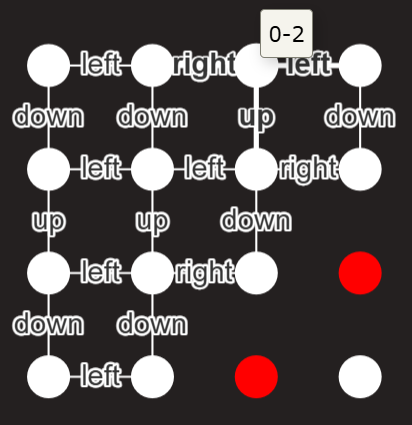

- Her graph only shows action in *one direction*, we want it both ways
- I added directed=True above

### Maze Problem formulation

Explore the derived *class MazeProblem(Problem)* for our Maze World example

In [49]:
from src.mazeProblemClass import MazeProblem

In [50]:
initState, goalState=(0,1),(0,3)

In [51]:
mp1=MazeProblem(initState,goalState,mazeWorldGraph)

In [52]:
testState=(0,2)

In [53]:
mp1.actions(testState)

['left', 'right']

## Problem Solving Agent in Maze

Now we are ready to consider `MazeProblemSolvingAgent class`

Explore the derived class `VacuumProblem(Problem)` for our Vacuum World example

However, we also need to check how our `BestFirstSearchAgentProgram` is able to process Maze World

In [54]:
from src.PS_agentPrograms import BestFirstSearchAgentProgram

In [55]:
BFSAP1=BestFirstSearchAgentProgram()

In [56]:
mp1.initial #mp1 instance of Maze Problem

(0, 1)

In [57]:
seq=BFSAP1(mp1)

The <Node (0, 1)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The child <Node (0, 2)> is being pushed to frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!


In [58]:
from src.agents import ProblemSolvingMazeAgentBFS

In [59]:
BFS_MazeAgent1=ProblemSolvingMazeAgentBFS(initState,mazeWorldGraph,goalState)

In [60]:
BFS_MazeAgent1.goal

(0, 3)

In [61]:
testNode=(0,2)

In [62]:
BFS_MazeAgent1(testNode)

The <Node (0, 2)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 1)> is being pushed to frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!
Solution (a sequence of actions) from the initial state to a goal: ['right']


!!!!!!!!!!!!!!!!!!!!!

Our Agent uses BFS as a search algorithm 

With **BFS** we choose a node, n, with minimum value of some evaluation function, f(n).

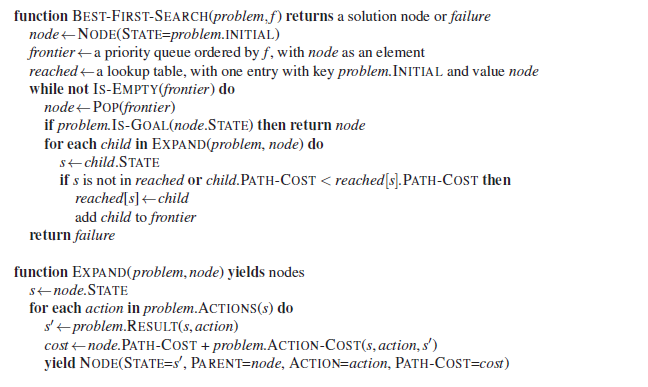

Let's create the environment for our Maze

In [67]:
from src.navigationEnvironmentClass import MazeNavigationEnvironment

In [68]:
maze_Env1=MazeNavigationEnvironment(mazeWorldGraph)

In [69]:
maze_Env1.status.graph_dict

{(0, 0): {(0, 1): 1, (1, 0): 1},
 (0, 1): {(0, 0): 1, (0, 2): 1, (1, 1): 1},
 (0, 2): {(0, 1): 1, (0, 3): 1},
 (0, 3): {(0, 2): 1, (1, 3): 1},
 (0, 5): {(1, 5): 1},
 (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
 (1, 1): {(1, 0): 1, (0, 1): 1, (2, 1): 1},
 (1, 3): {(0, 3): 1},
 (1, 5): {(0, 5): 1, (1, 6): 1, (2, 5): 1},
 (1, 6): {(1, 5): 1, (2, 6): 1},
 (2, 0): {(1, 0): 1, (2, 1): 1, (3, 0): 1},
 (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1, (3, 1): 1},
 (2, 2): {(2, 1): 1, (3, 2): 1},
 (2, 5): {(1, 5): 1, (2, 6): 1, (3, 5): 1},
 (2, 6): {(2, 5): 1, (1, 6): 1, (3, 6): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1},
 (3, 1): {(3, 0): 1, (2, 1): 1, (3, 2): 1},
 (3, 2): {(3, 1): 1, (2, 2): 1, (3, 3): 1},
 (3, 3): {(3, 2): 1, (4, 3): 1},
 (3, 5): {(2, 5): 1, (3, 6): 1, (4, 5): 1},
 (3, 6): {(3, 5): 1, (2, 6): 1, (4, 6): 1},
 (4, 3): {(3, 3): 1, (4, 4): 1, (5, 3): 1},
 (4, 4): {(4, 3): 1, (4, 5): 1, (5, 4): 1},
 (4, 5): {(4, 4): 1, (3, 5): 1, (4, 6): 1, (5, 5): 1},
 (4, 6): {(4, 5): 1, (3, 6): 1, (5, 6): 1},

In [70]:
BFS_MazeAgent2=ProblemSolvingMazeAgentBFS(initState,mazeWorldGraph,goalState)

In [71]:
BFS_MazeAgent2.performance # Is # of valid nodes

37

In [72]:
print(initState,goalState)

(0, 1) (0, 3)


In [73]:
intTupleTostr(goalState)

'0-3'

In [74]:
nodeColors

{'wall': 'red', 'path': 'white'}

In [ ]:
nodeColors.setdefault('goal', "green")
nodeColors.setdefault('init', "gold")
nodeColors

{'wall': 'red', 'path': 'white', 'goal': 'green', 'init': 'gold'}

In [ ]:
for node in net_maze.nodes:
    if node['id']==intTupleTostr(goalState):
        node['color']=nodeColors['goal']
    elif node['id']==intTupleTostr(initState):
        node['color']=nodeColors['init']

In [ ]:
net_maze.show("graphMaze1.html", notebook=False)

graphMaze1.html


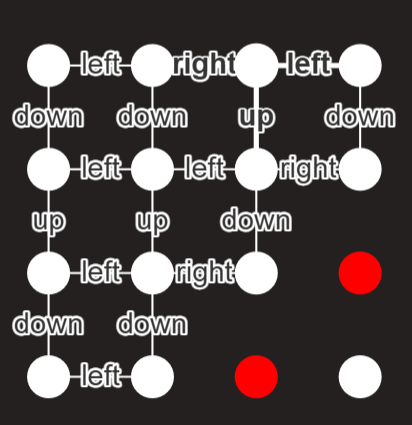  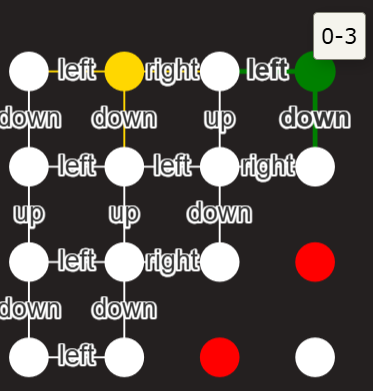

**!!!** As you can see the visualization of our Maze (above) is not complete enough (not all available actions are visible).
**You need to resolve this in your implementation.**

When we add the PS Agent into the Nav.Env. it should run its call() method 

In [ ]:
maze_Env1.add_thing(BFS_MazeAgent2) # Agent finds sequence to goal upon being added

The <Node (0, 1)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 2)> is being pushed to frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The child <Node (1, 2)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right']
The Agent in (0, 1) with performance 10


In [ ]:
maze_Env1.step()

Agent decided to do right.
Agent in right with performance = 9


In [ ]:
maze_Env1.step()

Agent decided to do right.
Agent in right with performance = 8
Agent reached all goals


In [ ]:
maze_Env1.step() # Her Agent dies upon reaching goal, we can change if we want for ours but don't need to

There is no one here who could work...


In [ ]:
maze_Env1.run() # Runs until it reaches goals

step 1:
Agent decided to do up.
Agent in up with performance = 13
step 2:
Agent decided to do up.
Agent in up with performance = 12
step 3:
Agent decided to do right.
Agent in right with performance = 11
Agent reached all goals
